## 04. Database Systems and Structed Query Language (SQL)

### What is Data?

*Statistics is the art of learning from data* - **Sheldon M. Ross** (University of California at Berkeley)

통계학의 큰 목표 중 하나는 데이터로부터 필요한 정보와 지식을 얻어내는 것입니다. 데이터라는 용어는 많이 듣고 접하는 용어이기 때문에 익숙하지만, 익숙한 만큼이나 데이터에 대해 자세히 생각해볼 기회가 많지 않습니다. 우리는 데이터가 무엇인지, 그 개념에 대해 살펴봅니다. **넓은 의미**의 데이터는 **의미 있는 정보를 가진 모든 값, 사람이나 자동화된 기계가 생성하거나 처리하는 형태로 표시될 수 있는 것**을 뜻합니다. 컴퓨터공학의 관점에서 데이터는 **프로그램을 운용할 수 있는 형태로 기호화·숫자화한 자료** 로 옥스포드 컴퓨터 용어 사전에 기술되어 있습니다. 또 일부 데이터 과학자들은 **어떤 값을 포함하고 있는 가공되지 않은 1차 자료** 라고 표현하기도 합니다. 바라보는 시각에 따라 다르겠지만, 공통적인 의미는 데이터는 **가공되지 않은 값** 정도로 해석할 수 있습니다. 따라서 데이터는 그 자체로 의미를 가진다기보다는, 실용적인 가치로 변환되기 위해서는 가공하고, 분석하고, 결합하는 등, 여러 과정을 거쳐야 합니다.

#### Data Pyramid

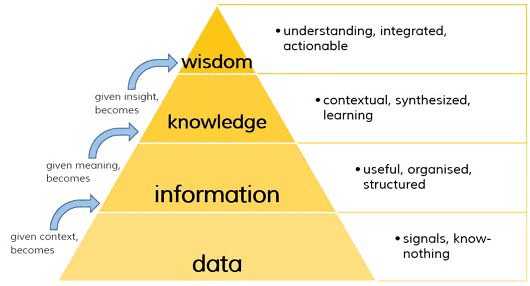

#### Graph of Steps by Data Processing

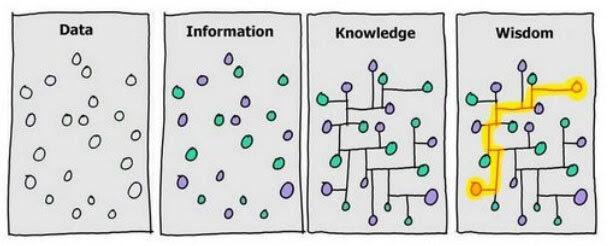

그림에서 알 수 있듯이, 많은 데이터들이 속에서 얻을 수 있는 **지식과 지혜는 한정적**입니다. 따라서, 우리는 더 많은 지식과 지혜를 통찰하기 위해 데이터를 더 많이 관찰하고, 확보하고, **저장**할 필요가 있습니다. 이렇게 데이터를 잘 저장할 수 있도록 체계를 만들어주는 것이 *데이터베이스 (DB, DataBase)* 입니다. 데이터베이스는 1) **실시간**으로 2) **변화**하는 데이터들을 여러 사람들에게 3) **공유** 할 수 있고, 내용을 참조하기 위해 4) **논리적으로 독립** 적인 형태로 만들어주는 데이터 모음의 집합체입니다.

#### Data

가공되기 전의 원천 데이터는 다음과 같은 형태로 생각할 수 있습니다. `센서명` _ `감지시작시각` _ `감지종료시각` _ `운영체제` _ `기기종류` _ `기기번호` _ `신호세기` 와 같은 형태로 이루어져 있습니다.

```
sensor0001_2023-08-31-10-00-00_2023-08-31-10-20-30_android_galaxynote10_0001_0-5
sensor0001_2023-08-31-10-01-00_2023-08-31-10-21-20_android_galaxynote09_0002_0-03
sensor0001_2023-08-31-10-00-30_2023-08-31-10-10-10_android_galaxynote10_0001_0-5
sensor0002_2023-08-31-10-03-00_2023-08-31-10-05-00_android_galaxyultra10_0004_0-7
```
$\dots$
```
sensor0031_2023-08-31-10-50-30_2023-08-31-10-80-40_android_galaxyultra10_0080_0-35
sensor0501_2023-08-31-10-01-20_2023-08-31-10-21-30_android_galaxyzflip05_0070_0-09
sensor0791_2023-08-31-10-30-10_2023-08-31-10-90-20_android_galaxyzflip05_0034_0-8
sensor0012_2023-08-31-10-33-50_2023-08-31-10-43-10_android_galaxys10_0023_0-2
```
$\dots$

#### Information
얻어진 원천 데이터를 가공하여 테이블 형태로 만들어 정보로써 저장합니다. 신호의 **세기가 0.3 이상인 신호만 유의미한 데이터**로 보고, **센서는 번호에서 매장+위치로 매핑**하여 다음과 같은 테이블을 완성합니다.


|sensor_id | starttime  |  endtime   |   os   | cellphone_type | cellphone_id | magnitude |
|----------|------------|------------|--------|----------------|--------------|-----------|
|olive?+left|230831100000|230831102030|andorid | galaxynote10   | 0001         | 0.5       |
|olive?+left|230831100030|230831101010|andorid | galaxynote10   | 0001         | 0.5       |
|olive?+up|230831100300|230831100500|andorid | galaxyultra10  | 0004         | 0.7       |
|$\dots$|||||||
|cg?+left|230831105030|230831108040|andorid | galaxyultra10  | 0080         | 0.35      |
|megabo?+right|230831103010|230831109020|andorid | galaxyzflip05  | 0034         | 0.8       |
|$\dots$|||||||

#### Knowledge
테이블 형태로 저장된 정보를 분석하여 지식으로써 활용할 수 있습니다. 예를 들어, `olive?+left` 센서에 감지된 사람들은 평균적으로 몇 분 체류했는지, `cg?+left` 센서에 감지된 사람들은 어떤 경로로 이동했는지, 등 테이블을 분석하여 다양한 지식을 얻을 수 있습니다.

#### Wisdom
얻어진 지식을 바탕으로 전략을 만들고, 지혜롭게 행동할 수 있습니다. 예를 들면, `olive?`의  매장 환경을 개선할 수 있습니다. `olive?+left` 센서에 감지된 사람들이 평균적으로 10분 이상 체류하지 않았다면, `olive?+left` 센서가 설치된 위치에 행사 물품들을 배치하여 해당 공간의 체류 시간을 늘려 공간 활용도를 높일 수 있습니다. `cg?+left`에 감지된 사람들은 대개 다른 `cg?`의 공간에 체류하지 않고 신호가 사라지는 것으로 보아, `cg?+left` 위치에서 감지된 사람들은 목적성이 높은 사람이라고 판단할 수 있습니다.

### What is DataBase?

데이터베이스를 한 마디로 간단히 정의하면, **데이터들의 모음** 이라고 할 수 있습니다. 더 구체적으로는 **전자적**으로 저장되고 체계적인 데이터 모음입니다. 여기에는 단어, 숫자, 이미지, 비디오 및 파일을 포함한 모든 유형의 데이터가 포함될 수 있습니다. *데이터베이스 관리 시스템 (DBMS, DataBase Management Systems)* 이라는 소프트웨어를 사용하여 데이터를 저장, 검색 및 편집할 수 있습니다. 컴퓨터 시스템에서 데이터베이스라는 용어는 모든 데이터베이스 관리 시스템, 데이터베이스 시스템 또는 데이터베이스와 관련된 응용 프로그램을 나타내기도 합니다. 현대 데이터베이스에는 일상생활의 대부분이 저장되고 있습니다. 우리가 주고받는 메세지, 인스타그램에 올리는 글, 심지어는 오늘 구매한 커피마저도 모두 데이터베이스에 기록됩니다.

우리는 항상 데이터베이스와 상호작용 하고 있습니다. 현실 세계에서 데이터베이스와 상호 작용하는 대표적인 예시로는 금융 거래가 있습니다. 데이터베이스의 정의에 따라, 1) **실시간으로 계좌의 거래 내역을 조회할 수 있고** 2) **계좌의 입출금 내역에 따라 변화하는 것을** 3) **본인, 은행, 그리고 여러 응용 프로그램들이 공유하고**, 4) **다른 사람의 계좌와 혼동되지 않게** 처리됩니다. 금융 거래에서는 단 하나라도 오류가 생길 경우 큰 문제로 이어질 수 있기 때문에 모든 처리 과정들이 빠르고 안전하게 진행되어야 합니다.

### File Systems vs DataBase

데이터베이스가 등장하기 이전에는 파일 시스템을 통해 데이터를 관리했습니다. 여기서 파일 시스템이란, *Windows*나 *linux*와 같은 운영체제에서 제공되는 파일 시스템과 동일합니다. 즉, 우리가 일반적으로 파일을 다루는 방식으로 데이터를 저장하고, 수정하고, 삭제하는 등 관리를 했습니다. 하지만, 프로그램이 복잡해지고, 데이터가 다양해지고 많아지며 이러한 파일 시스템 방식의 한계가 드러나기 시작했습니다. 대표적인 파일 시스템의 한계 5 가지를 살펴보도록 하겠습니다.

가장 먼저 데이터의 **종속성** 문제입니다. 데이터의 종속성이란, 응용 프로그램이 파일을 데이터로 이용하여 동작하고 있을 때, 파일의 데이터 구조가 변경되면 응용 프로그램 또한 수정이 되야한다는 것을 의미합니다. 예를 들어, 과거에는 **학생 정보**를 일년에 한번 취합했는데, 이제는 더 자세히 조사하기 위해 한달에 한번 취합하기로 변경했습니다. 취합한 내용은 파일에 기록하고 있습니다. 기존 구조는 **학생 이름**, **성별**, **학번**, **학과** 였는데, 한달에 한번 취합하면서 **주소**와 **재학 여부**를 추가하기로 했습니다. 이렇게 데이터 구조가 변경되면, 기존에 작성된 프로그램들은 많은 수정이 필요합니다. 과거의 데이터에는 재학 여부 항목이 없고, 최근의 데이터는 달에 한번씩 자주 쌓이기 때문입니다.

두 번째는 데이터의 **호환성** 문제입니다. 같은 정보를 표현하는 데이터의 표현 방식이 여러개인 경우에 발생합니다. 예를 들어, 통계학과에서는 학번을 **202334259**와 같이 숫자로 저장하고 있었습니다. 반면, 인공지능전공은 학번을 문자열로, **"2023-34259"**와 같이 저장하고 있었습니다. 이렇게 같은 정보를 나타내는 데이터를 다른 방식으로 표현하면, 서로 다른 사용자간에 호환되지 않는 경우가 발생합니다. 데이터베이스 시스템에서는 형태가 다른 것들이 입력되었을 때, 지정된 형태로 자동으로 형태변환을 하거나 입력을 거부하는 방식을 통해 호환성 문제로부터 자유로울 수 있습니다.

세번째는 데이터의 **중복성** 문제입니다. 호환성 문제와 마찬가지로, 같은 정보를 표현하는 파일이 학과에 따라 다르게 저장되고 있습니다. 따라서, 이러한 경우 동일한 내용이 중복되어 있는 파일이 사용자들 사이에 여러개 존재하게 됩니다. 중복된 데이터의 증가는 저장 용량을 낭비하게 되고, 이것은 데이터를 유지하는 데에 경제적인 문제를 야기하게 됩니다. 최신 데이터베이스 시스템에서는 하나의 테이블을 만들어 데이터를 저장하고, 이 테이블을 여러 사용자가 공유함으로써 중복성 문제를 해결할 수 있습니다.

네번째는 데이터 **무결성** 문제입니다. 통계학과에서 사용하고 있는 숫자 형태의 학번 관리는, 문자열로 저장이 될 수도 있습니다. 즉, 202334259가 숫자일 수도 있고, "202334259"가 문자열일 수도 있습니다. 데이터가 설계될 때와 다른 형식으로 입력되는 경우 데이터의 무결성이 침해됩니다. 데이터베이스 시스템이 있다면 형태가 다른 것들이 입력되는 것을 거부하여 무결성을 유지할 수 있지만, 파일 시스템에서는 응용 프로그램 개발자가 매번 데이터의 입력에 대해 검사하는 기능을 구현해야 했습니다.

마지막으로 데이터 **불일치** 문제입니다. 통계학과와 인공지능전공은 학번이라는 같은 정보를 서로 다른 형태로, 서로 다른 파일로 저장하고 있습니다. 그런데, 어떤 통계학과와 인공지능전공을 복수전공하는 학생이 이사를 가서 집 주소가 변경되었습니다. 하지만 통계학과 수업을 모두 들어서, 통계학과 건물에 갈 일이 없어 변경된 주소를 인공지능전공에만 변경 신청을 했습니다. 이 경우, 통계학과는 이전 집 주소를, 인공지능전공은 현재 집 주소를 가지고 있게 됩니다. 이렇게 데이터의 불일치가 발생하면, 데이터의 신뢰도가 떨어지고 정확도가 떨어지게 됩니다. 데이터베이스에서는 두 학과에서 하나의 테이블에 접근하여 주소를 관리하도록 할 수 있으므로, 불일치 문제를 줄일 수 있습니다.

### Types of DataBase

데이터의 형태는 고정된 것이 아니라 다양하기 때문에, 데이터베이스 또한 여러가지 유형이 있습니다. *계층형 (Hierarchical)*, *네트워크형 (Networks)*, *관계형 (Relational)* *비 관계형 (NoSQL)* 등 다양한 종류가 존재합니다. 현재 그 중 가장 많이 활용되는 것은 관계형 데이터베이스입니다.

계층형 데이터베이스는 다음과 같은 구조를 갖습니다.

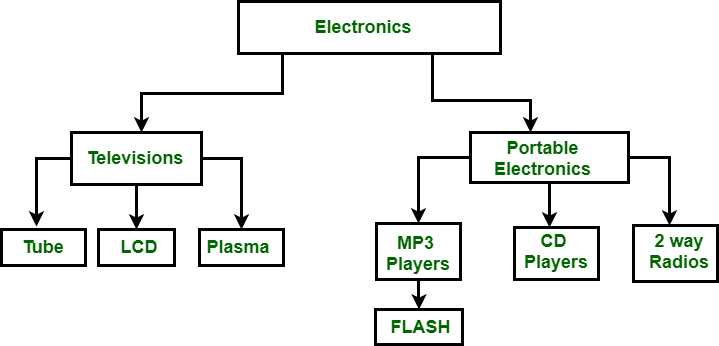

계층형 데이터베이스의 특징으로는, $1:1$ 혹은 $1:n$ 관계를 취하도록 설계가 되어 있고, 트리 구조로 되어 있습니다. 또한, 한 부모 노드를 삭제하면, 그 부모 노드 이하의 자식 노드들은 모두 접근할 수 없고, 자식 노드들 또한 조부모 세대의 노드로 접근할 수 없습니다. 한 노드에서 다른 노드로 접근할 때 반드시 부모 노드들을 거쳐 접근해야 하므로 속도가 느립니다. 마찬가지로 어떠한 노드는 부모 노드에 의존적이기 때문에 초기의 설계가 변경되게 되면 일부만 수정하는 것이 어렵습니다.

네트워크형 데이터베이스의 구조는 다음과 같습니다.

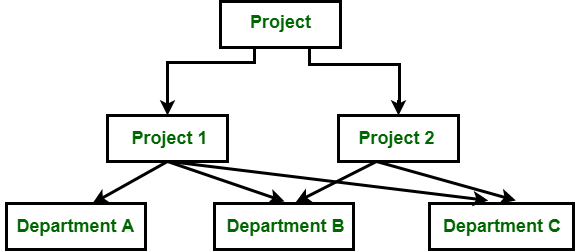

네트워크형 데이터베이스는 $1:1$, $1:n$, $n:n$ 관계를 구현하도록 되어 있고, 트리 대신 그래프 구조를 이용합니다. 또한 부모 노드가 삭제되더라도 다른 노드로부터 접근할 수 있다면, 특정 노드가 삭제되는 것에 문제가 없습니다. 한 노드에서 다른 노드로 접근할 때 다양한 경로가 존재하고, 최단 경로를 통해 빠르게 접근할 수 있습니다. 하지만, 네트워크형 데이터베이스는 계층형 데이터베이스보다 복잡하고, 프로그램이 이 형태를 잘 활용하기 어렵습니다. 왜냐하면, 수많은 연결 관계를 개발자가 모두 고려하고 있어야하기 때문입니다.

이러한 이유들로, 계층형 데이터베이스와 네트워크형 데이터베이스는 현재는 사실상 사용되지 않고 있습니다.

가장 많이 활용되는 관계형 데이터베이스는 구조는 다음과 같습니다.

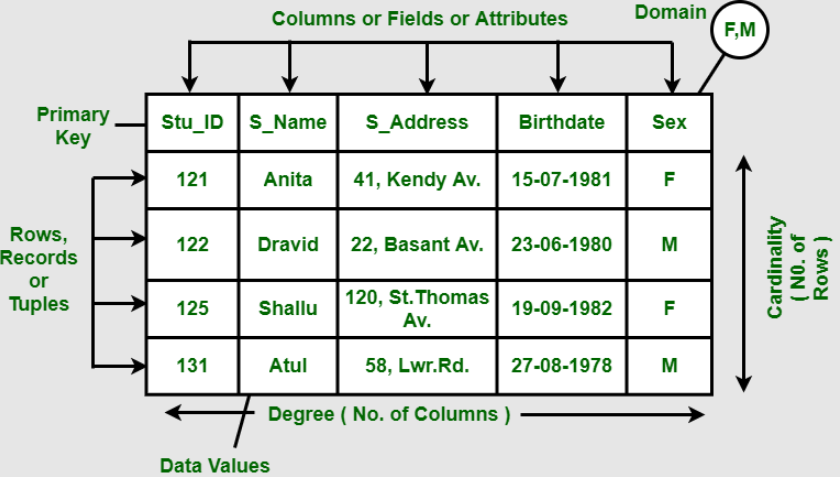

관계형 데이터베이스는 테이블 형태로 구성되어 있으며, 직관적으로 내용을 이해할 수 있습니다. 테이블간의 공통된 열을 이용하여 관계를 설정할 수 있습니다. 예를 들어 **A**라는 테이블에는 **나이**, **학번**, **이름** 이 있고, **B**라는 테이블에는 **학번**, **키**, **몸무게**가 있는 경우, 학번이라는 열을 이용하여 두 테이블의 관계를 설정할 수 있습니다. 네트워크형 데이터베이스와 마찬가지로 $1:1$, $1:n$, $n:n$ 관계를 모두 구현할 수 있습니다. 또한 테이블 형태만 유지하면 유연하게 설계할 수 있습니다. 많은 경우 현실 세계의 데이터는 테이블화하여 저장되고 있습니다. 하지만, 데이터베이스 테이블을 설계할 때 어떤 컬럼을 어떤 형태로 넣을 지 사전에 정의해주어야 합니다. 이것이 변경되었을 때 계층형 데이터베이스보다는 덜 수고롭지만, 여전히 변경사항을 적용하는 것은 상당히 복잡한 작업입니다.

관계형 데이터베이스는 **테이블 사이의 관계**를 잘 유지하기위해 *키 (key)*라는 개념을 이용합니다. 키는 5개의 종류로 구분됩니다.
**학생이라는 테이블**이 있고, **학번**, **이름**, **주민등록번호**, **이메일 주소** 이라는 열이 존재합니다.

1. *슈퍼키 (Super Key)*: 테이블에 내의 데이터를 **유일하게 식별할 수 있는 열 혹은 열들의 집합**입니다. 학생이라는 테이블이 있다면, **학번**은 유일하므로 슈퍼키가 될 수 있고, **학번+이름**과 같이 두 열을 함께 이용하더라도 유일성을 만족할 수 있으므로 슈퍼키가 가능합니다. 
2. *후보키 (Candidate Key)*: 후보키는 테이블 내의 데이터를 **유일하게 구별하기 위한 최소한의 열 혹은 열들의 집합**입니다. 예를 들어, 학번, 주민등록번호, 이메일 주소 등이 있습니다. 후보키는 테이블 내의 데이터를 유일하게 구별할 수 있어야 하므로, 테이블 내에서 중복되는 값이 존재해서는 안됩니다. 후보키는 테이블 내에 여러개 존재할 수 있지만, 유일성과 최소성을 모두 만족해야 합니다. 학생 테이블에서 **이름+주민등록번호**로 유일성을 만들 수 있더라도, 주민등록번호만으로 유일성을 만들 수 있으므로 둘 중 최소성을 만족하는 주민등록번호만 후보키가 됩니다.
3. *기본키 (Primary Key)*: 후보키 중 대표로 선택하는 하나의 키입니다. 후보키는 여러개 존재할 수 있지만, 기본키는 하나만 존재합니다.
4. *대체키 (Alternative Key)*: 후보키 중 기본키를 제외한 나머지 키들입니다.
5. *외래키 (Foreign Key)*: 어떤 테이블간의 관계를 설정할 때, 다른 테이블의 기본키를 참조하는 키입니다. 예를 들면, 학생 테이블이 **학번**, **이름**, **주민등록번호**, **이메일 주소** 이고, 수업 테이블이 **학번** , **과목명**, **수업 시간** 이라고 할 때, 수업 테이블의 학번은 학생 테이블의 학번을 참조하고 있습니다. 이 때, 수업 테이블의 학번은 외래키가 됩니다.

**NoSQL**은 정해진 구조를 갖지 않습니다.

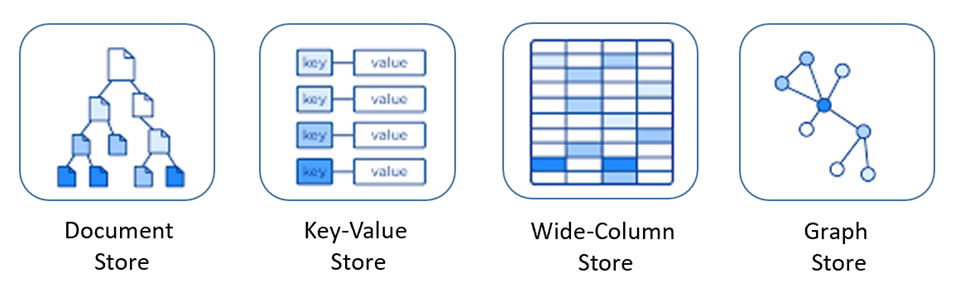

NoSQL은 특정한 구조를 갖지 않는 형태의 데이터베이스 형식입니다. 관계형 데이터베이스는 사전에 테이블에 어떤 정보들을 어떤 형태로 저장할지 미리 정의해두어야 하고, 테이블의 공통된 열을 통해 여러 테이블간의 관계를 구성하여 필요한 경우 서로 활용하는 형태입니다. 반면, NoSQL은 *그래프*, 혹은 *Key-Value* 와 같은 다양한 형태로 구성이 가능하며, 이것을 사정에 미리 정의해두지 않아도 괜찮습니다. 따라서 데이터의 형태가 다양해질수록, 테이블화하는 것이 어려울수록 사용성, 편의성, 가용성 등에서 관계형 데이터베이스보다 탁월한 성능을 보이고 있습니다. 다른 데이터베이스 형태와 다르게 데이터의 형태가 변경되어도 상대적으로 수정하는 것이 간편합니다.

### DataBase Management Systems (DBMS)

데이터베이스를 데이터의 집합이라고 정의한다면, 데이터베이스를 관리하고, 운용하는 프로그램을 데이터베이스 관리 시스템이라고 부릅니다. 데이터베이스 관리 시스템은 다양한 데이터 형태에 대해 저장할 수 있고, 다수의 사용자들에게 공유가 가능하며 동시 접근이 가능해야 합니다. 이러한 관점에서 마이크로소프트의 엑셀 또한 일종의 데이터베이스 관리 시스템이라고 볼 수도 있습니다. 다만, 이 경우는 공유와 동시 접근이라는 기능이 설정을 통해 한정적으로 제공됩니다. 많이 활용되고 있는 데이터베이스 관리 시스템은 *MySQL*, *PostgreSQL*, *SQLite* 등이 있습니다. MySQL, PostgreSQL, SQLite는 모두 오픈소스 프로젝트이며, 데이터베이스 영역에서 가장 활발하게 진행되고 있는 프로젝트들입니다.

### Structured Query Language (SQL)

데이터베이스를 잘 관리하고 운영하기 위해 나온 프로그램이 데이터베이스 관리 시스템이라면, 이것을 잘 활용하기 위해 개발된 언어가 *SQL* 입니다. 관계형 데이터베이스를 기반으로 만들어졌고, SQL을 통해 관계형 데이터베이스에서 정보를 저장하고, 업데이트하고, 제거하고, 검색하는 것이 가능합니다. 따라서 SQL을 잘 이용하는 것이 데이터베이스를 잘 관리하고 유지하는 것에 중요한 역할을 합니다. SQL은 특정 기업, 혹은 특정 연구소에서 정한 것이 아니라 ANSI(American National Standard Institute)와 ISO/IEC(International Standard Organization/International Electrotechnical Commission)에서 공동으로 SQL의 표준을 제정했습니다. 하지만, 데이터베이스의 종류가 여러가지이고, 각각 추구하는 바가 다르므로 SQL 표준이 각 데이터베이스의 장점을 살리지 못하는 경우가 있습니다. 그러한 이유로 일부 데이터베이스에서는 표준화되지 않은 SQL들을 활용하여 성능을 최적화하는 경우도 있습니다.

본 실습은 *SQLite* 를 이용하여 진행합니다. [여기](https://mystery.knightlab.com/walkthrough.html)에 접속하여 진행합니다.

SQL 공부에 관심이 있다면, 다음 자료들을 참고하면 좋습니다.

* [PostgreSQL Tutorials](https://www.postgresql.org/docs/online-resources/)
* [Relational Database Tutorials](https://www.devkuma.com/docs/category/data-science/rdb/)
* [DataLemur](https://datalemur.com/)